# Effects of coefficients on logistic regression model

### Housekeeping

In [1]:
import sympy as sy
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab
%matplotlib inline
from IPython.display import Image

This notebook is designed to get some additional intuition around this topic which is covered in Week One of the Classification module of the ML specialization course.

# Effect on linear decision boundary

The decision boundary separates the two classes, in this case positive and negative.  In this example the decision boundary is linear and  based on some weight of the number of awesomes plus some weight of the number of awfuls.

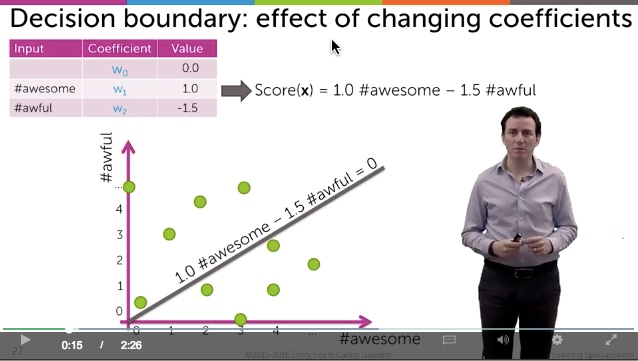

In [19]:
Image(filename='EffectOfCoefficientsOnBoundary.jpg')

In [2]:
# Sets up a linear expression
x = sy.Symbol('x')
y = sy.Symbol('y')
w0 = sy.Symbol('w0')
w1 = sy.Symbol('w1')
boundary_function = w0*x - w1*y
sy.pprint(boundary_function)

w₀⋅x - w₁⋅y


In [3]:
# Solves the linear expression for y
boundary_function = sy.solve(boundary_function,y)
sy.pprint(boundary_function)

⎡w₀⋅x⎤
⎢────⎥
⎣ w₁ ⎦


In [4]:
def create_boundary(boundary_x,coefficients):
    '''
    This functions creates a list of y values for a list of x values using the boundary function solved for y
    '''
    boundary_function = (w0*x)/w1
    boundary_y = []
    for x_value in boundary_x:
        y = boundary_function.subs({w0:coefficients[0],w1:coefficients[1],x:x_value})
        boundary_y.append(y)
    return boundary_y 

In [5]:
def plot_input_boundary(awesomes,awfuls,coefficients=[1.,1.]):
    '''
    This functions plots inputs - provided in the form of 
    a list of # of awesomes and 
    a list of corresponding # of awfuls - 
    as well as the boundary line between inputs resulting in a positive versus negative score
    '''
    max_awesomes = max(awesomes) + 1
    max_awfuls = max(awfuls) + 1
    x_max = max(max_awesomes,max_awfuls)
    boundary_x = list(range(0,x_max + 1))
    boundary_y = create_boundary(boundary_x,coefficients)
    pylab.axis(xmin=0)
    pylab.axis(xmax=max_awesomes)
    pylab.axis(ymin=-0.1)
    pylab.axis(ymax=max_awfuls)
    pylab.xlabel("# of awesomes")
    pylab.ylabel("# of awfuls")
    plt.plot(boundary_x,boundary_y,label='Boundary')
    plt.plot(awesomes,awfuls,'ro',label='Inputs')
    plt.legend(loc='upper center', shadow=True)

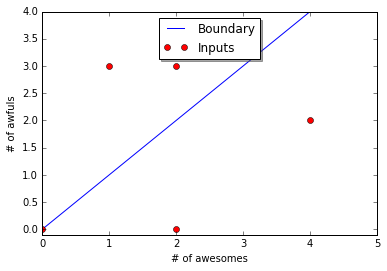

In [6]:
# Put in different coefficients and see how this impacts the boundary line
awesomes = [2,2,4,0,1]
awfuls = [0,3,2,0,3]
coefficients_1 = [1,1]
plot_input_boundary(awesomes,awfuls,coefficients=coefficients_1)

# Effect on the sigmoid function

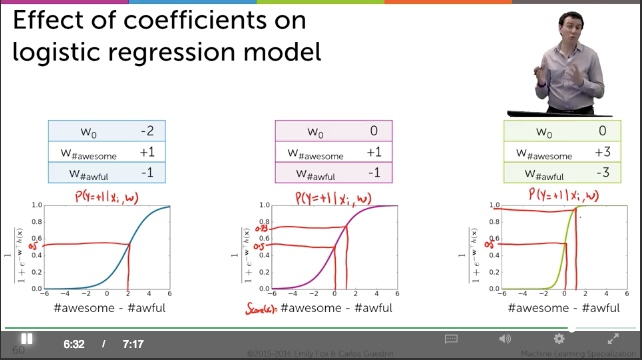

In [17]:
Image(filename='EffectOfCoefficientsOnSigmoid.jpg')

In the example below - like in the training course - we will use a linear expression of kind 
w0 + w1*#awesomes + w2*#awfuls

In [8]:
# Provide some inputs and the coefficients for the linear boundary function and see how that impacts the graph
# Each items in the list awesomes must correspond to the item with the same index in the list awfuls!
coefficients_1 = [-2.,1.,1.] # Example 1
coefficients_2 = [0.,1.,1.]  # Example 2
coefficients_3 = [0.,3.,3.]  # Example 3

Logistic reggression uses the sigmoid or logit function to squeeze the real line to [0,1].

Recall from the lectures that we can also calculate the probability predictions from the scores using:
$$
\frac{1}{1 + e^{-score}}
$$

In [9]:
score = sy.Symbol('score')
sigmoid_function = 1 / (1 + math.e ** (-1*score))
sy.pprint(sigmoid_function) # pretty print function Sigmoid

            1             
──────────────────────────
                    -score
1 + 2.71828182845905      


Let's plot this function

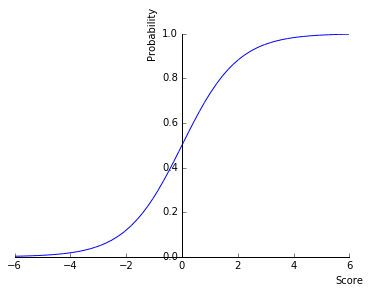

In [10]:
sy.plot(sigmoid_function, (score,-6,6), xlabel = 'Score', ylabel = 'Probability')

You can see that as the score gets smaller the prob converges to 0 and as the score gets higher the probability becomes 1.

In [11]:
def get_probability(one_score):
    '''
    This functions take in a single score - which could be any real number - 
    and squeezes it into the 0-1 range, respresenting the min and max of a prob
    '''
    s = one_score
    prob = round(sigmoid_function.subs({score:s}),4)
    return prob

In [12]:
def logistic_regression(awesomes,awfuls,coefficients):
    '''
    This function takes a list of # of awesomes and a list of corresponding # of awfuls and w0,w1 and w2 coefficients
    and returns both the scores (result of linear function) as well as the probabilities (result sinoid).
    '''
    scores = []
    probabilities = []
    for i in range(len(awesomes)):
        awesome = awesomes[i]
        awful = awfuls[i]
        one_score = coefficients[0] +  coefficients[1] * awesome - coefficients[2] * awful
        scores.append(one_score)
        one_prob = get_probability(one_score)
        probabilities.append(one_prob)
    return scores,probabilities

In [13]:
# Automated way to create a whole bunch of awesomes and awfuls as well as the difference between them.
# This will create a smooth graph
awesomes = []
awfuls = []
for i in list(np.arange(0,6,.1)):
    for j in list(np.arange(0,6,.1)):
        awesomes.append(i)
        awfuls.append(j)
x_values = np.array(awesomes) - np.array(awfuls)

In [14]:
# Call our function three times to get scores and prob of our awesomes and awfuls using each of the three coeff sets
example_1 = logistic_regression(awesomes,awfuls,coefficients_1)
example_2 = logistic_regression(awesomes,awfuls,coefficients_2)
example_3 = logistic_regression(awesomes,awfuls,coefficients_3)

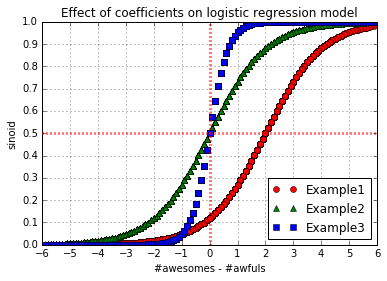

In [15]:
# Plot the three scenarios

plt.figure(figsize=(10,5))
fig, ax = plt.subplots()
plt.title('Effect of coefficients on logistic regression model')

plt.xlim([-6,6])
plt.ylim([0,1])
plt.xlabel("#awesomes - #awfuls")
plt.ylabel("sinoid")

ax.set_xticks(range(-6,7), minor=False)
ax.xaxis.grid(True, which='major')
a = ax.get_xgridlines()
b = a[6]
b.set_color('red')
b.set_linewidth(3)

ax.set_yticks(np.arange(0,1.1,.1), minor=False)
ax.yaxis.grid(True, which='major')
c = ax.get_ygridlines()
d = c[5]
d.set_color('red')
d.set_linewidth(3)

plt.plot(x_values,example_1[1],'ro',label = 'Example1')
plt.plot(x_values,example_2[1],'g^',label = 'Example2')
plt.plot(x_values,example_3[1],'bs',label = 'Example3')

ax.legend(loc='lower right')
plt.show()